In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import re
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso,Ridge
from sklearn.preprocessing import StandardScaler
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

In [2]:
data=pd.read_csv(r"C:\Users\HP\Downloads\ApartmentRentPrediction.csv")



In [3]:
data.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3185
bathrooms          30
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     3751
price               0
price_display       0
price_type          0
square_feet         0
address          2971
cityname           66
state              66
latitude            7
longitude           7
source              0
time                0
dtype: int64

check distribution if normal or not

In [4]:
columns_to_clean = ['bathrooms','bedrooms','latitude','longitude']


#Remove null values from specific columns
data = data.dropna(subset=columns_to_clean)

Text(0.5, 1.0, 'Histogram of column_name')

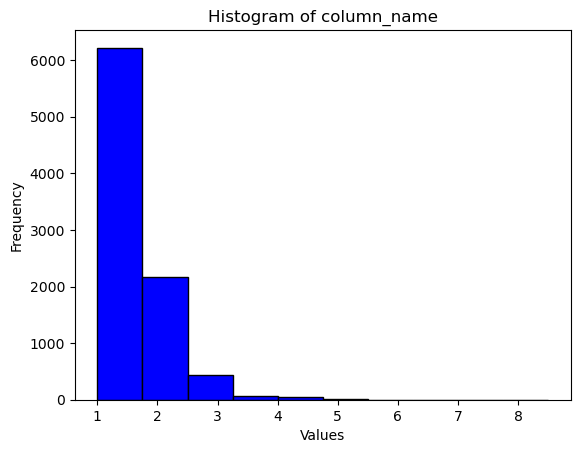

In [5]:
plt.hist(data['bathrooms'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of column_name')

In [6]:
data['bathrooms'] = np.where(data['bathrooms'] >=4, 3, data['bathrooms'])

Text(0.5, 1.0, 'Histogram of column_name')

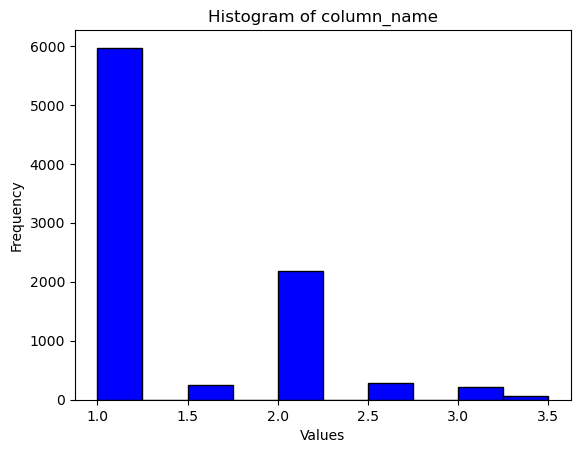

In [7]:
plt.hist(data['bathrooms'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of column_name')

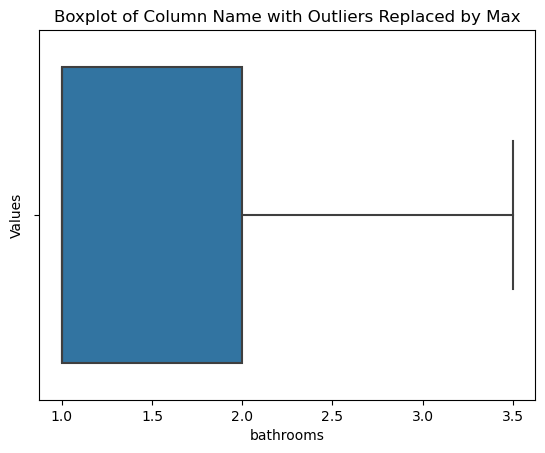

In [8]:
sns.boxplot(x='bathrooms', data=data)
plt.xlabel('bathrooms')
plt.ylabel('Values')
plt.title('Boxplot of Column Name with Outliers Replaced by Max')
plt.show()

In [9]:
data['bathrooms'].fillna(data['bathrooms'].mean(), inplace=True)

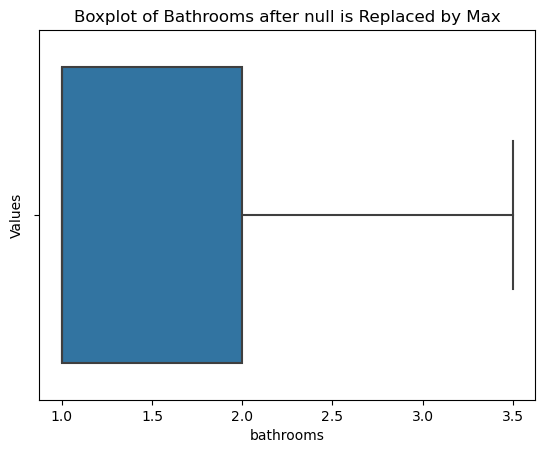

In [10]:
sns.boxplot(x='bathrooms', data=data)
plt.xlabel('bathrooms')
plt.ylabel('Values')
plt.title('Boxplot of Bathrooms after null is Replaced by Max')
plt.show()

## Bedrooms

Text(0.5, 1.0, 'Histogram of bedrooms')

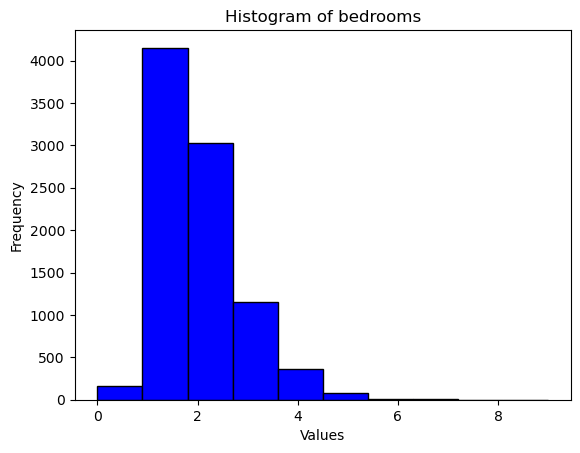

In [11]:
plt.hist(data['bedrooms'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of bedrooms')
#normal

In [12]:
data['bedrooms'].fillna(data['bedrooms'].mean(), inplace=True)

Text(0.5, 1.0, 'Histogram of bedrooms after replace null with max value')

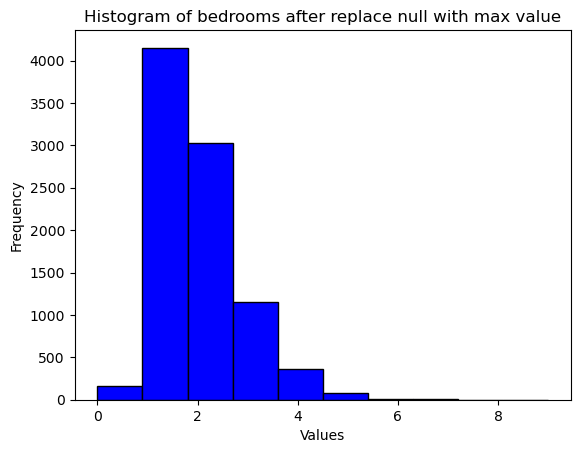

In [13]:
plt.hist(data['bedrooms'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of bedrooms after replace null with max value')

## Square_feet

Text(0.5, 1.0, 'Histogram of square_feet')

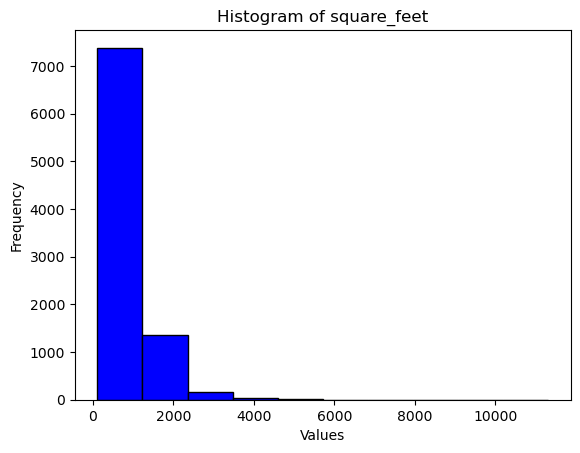

In [14]:
plt.hist(data['square_feet'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of square_feet')
# not normal

In [15]:
data['square_feet']=np.log(data['square_feet'])

Text(0.5, 1.0, 'Histogram of square_feet')

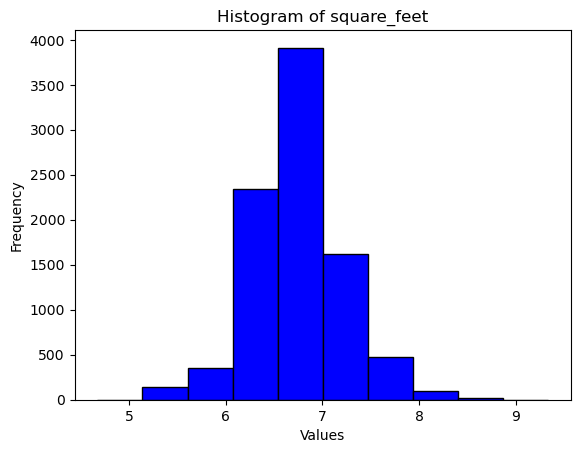

In [16]:
plt.hist(data['square_feet'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of square_feet')

Text(0.5, 1.0, 'Boxplot of sqaure_feet')

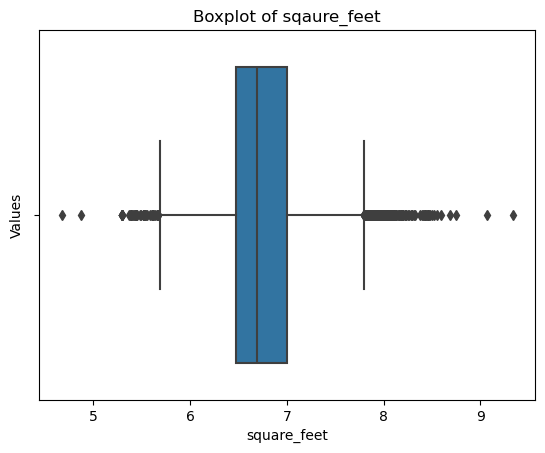

In [17]:
sns.boxplot(x='square_feet', data=data)

# Adding labels and title
plt.xlabel('square_feet')
plt.ylabel('Values')
plt.title('Boxplot of sqaure_feet')

In [18]:
data['square_feet'] = np.where(data['square_feet'] >=7.6, 7.7, data['square_feet'])
data['square_feet'] = np.where(data['square_feet'] <=5.7, 5.7, data['square_feet'])

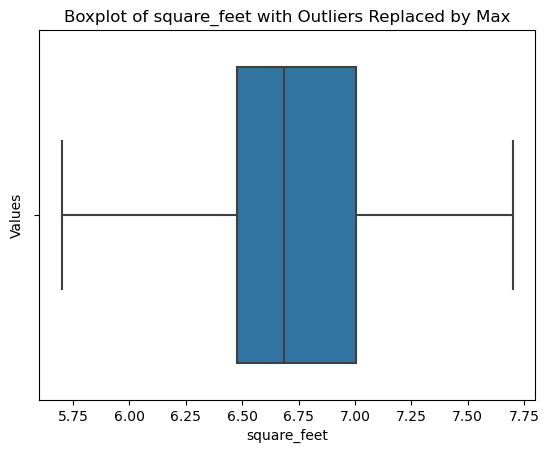

In [19]:
sns.boxplot(x='square_feet', data=data)
plt.xlabel('square_feet')
plt.ylabel('Values')
plt.title('Boxplot of square_feet with Outliers Replaced by Max')
plt.show()

Text(0.5, 1.0, 'Histogram of square_feet')

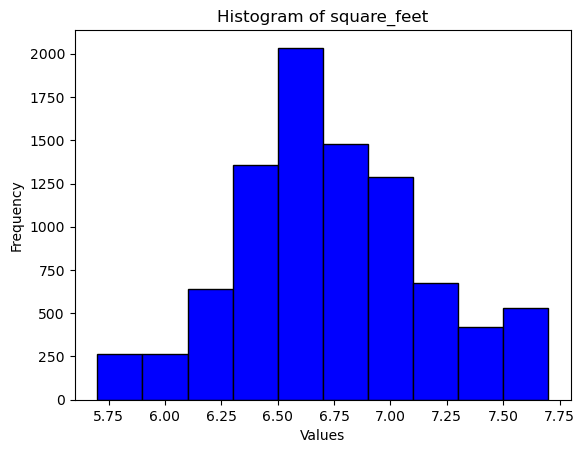

In [20]:
plt.hist(data['square_feet'], bins=10, color='blue', edgecolor='black')


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of square_feet')

## Longitude

Text(0.5, 1.0, 'Histogram of longitude')

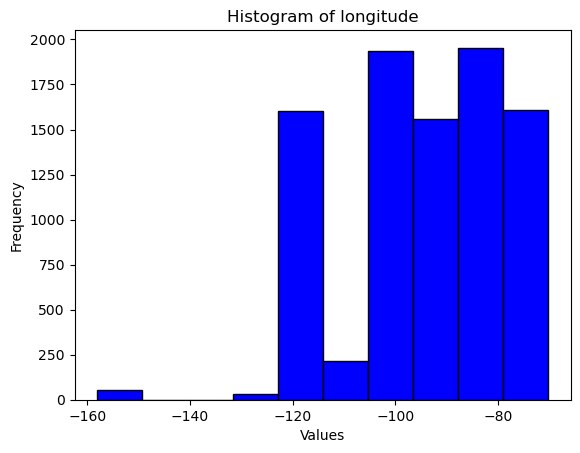

In [21]:
plt.hist(data['longitude'], bins=10, color='blue', edgecolor='black')


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of longitude')


In [22]:
data['longitude'] = np.where(data['longitude'] <=-122, -122, data['longitude'])

Text(0.5, 1.0, 'Histogram of longitude after replace null with max value')

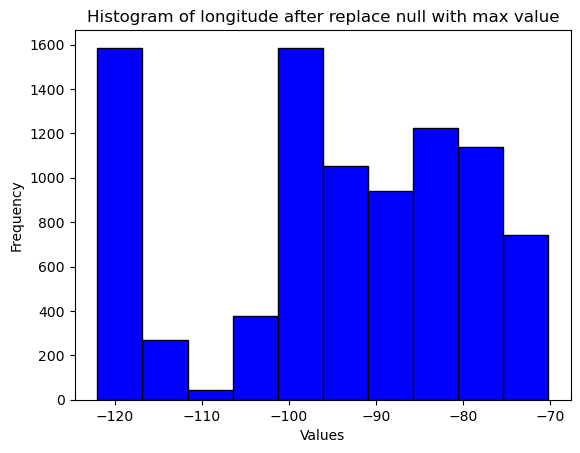

In [23]:
plt.hist(data['longitude'], bins=10, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of longitude after replace null with max value')

## Latitude

Text(0.5, 1.0, 'Histogram of latitude')

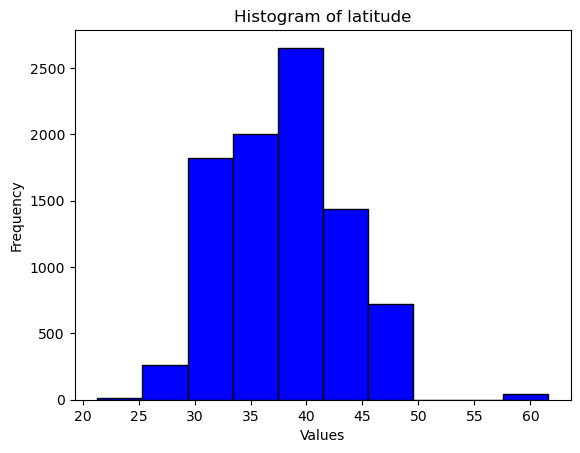

In [24]:
plt.hist(data['latitude'], bins=10, color='blue', edgecolor='black')


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of latitude')


In [25]:
data['latitude'] = np.where(data['latitude'] <=25, 25, data['latitude'])
data['latitude'] = np.where(data['latitude'] >=50, 50, data['latitude'])

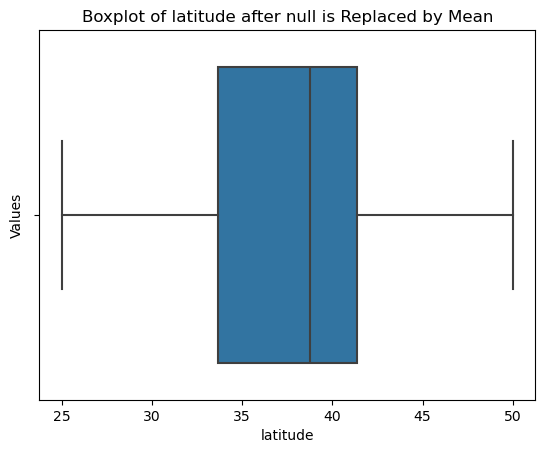

In [26]:
sns.boxplot(x='latitude', data=data)
plt.xlabel('latitude')
plt.ylabel('Values')
plt.title('Boxplot of latitude after null is Replaced by Mean')
plt.show()

In [27]:
data.isnull().sum()

id                  0
category            0
title               0
body                0
amenities        3150
bathrooms           0
bedrooms            0
currency            0
fee                 0
has_photo           0
pets_allowed     3723
price               0
price_display       0
price_type          0
square_feet         0
address          2953
cityname           59
state              59
latitude            0
longitude           0
source              0
time                0
dtype: int64

## String columns

In [28]:
object_columns = data.select_dtypes(include=['object']).columns
for col in object_columns:
    data[col] = data[col].str.lower()
    data[col] = data[col].fillna(data[col].mode)
data

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5508832632,housing/rent/apartment,"two br - $1,194/mo - apartment - come and see ...","come experience. in cary, nc offering recently...","clubhouse,fireplace,gym,patio/deck,playground,...",2.5,2.0,usd,no,thumbnail,...,"$1,194",monthly,6.684612,<bound method Series.mode of 0 ...,cary,nc,35.7585,-78.7783,rentdigs.com,1568755960
1,5664576849,housing/rent/apartment,one br 640 west wilson street,this unit is located at 640 west wilson street...,"cable or satellite,dishwasher,elevator,garbage...",1.0,1.0,usd,no,thumbnail,...,"$1,370",monthly,6.678342,640 west wilson st,madison,wi,43.0724,-89.4003,rentlingo,1577015508
2,5668619365,housing/rent/apartment,one br 2777 sw archer rd,"this unit is located at 2777 sw archer rd, gai...","basketball,cable or satellite,dishwasher,inter...",1.0,1.0,usd,no,thumbnail,...,"$1,009",monthly,6.327937,2777 sw archer road,gainesville,fl,29.6533,-82.3656,rentlingo,1577358921
3,5668632604,housing/rent/apartment,one br 534-542 park avenue,"this unit is located at 534-542 park avenue, o...",<bound method Series.mode of 0 clubhouse...,1.0,1.0,usd,no,thumbnail,...,$695,monthly,6.396930,534-542 park ave,omaha,ne,41.2562,-96.0404,rentlingo,1577359849
4,5668637441,housing/rent/apartment,three br 2216 s palm grove ave,"this unit is located at 2216 s palm grove ave,...",<bound method Series.mode of 0 clubhouse...,3.0,3.0,usd,no,thumbnail,...,"$3,695",monthly,7.377759,2216 s palm grove avenue,los angeles,ca,34.0372,-118.2972,rentlingo,1577360159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,5509251724,housing/rent/apartment,prominence apartments two br luxury apartment ...,price from: 1158. your hunt for apartments to ...,"clubhouse,gym,patio/deck,pool",1.0,2.0,usd,no,thumbnail,...,"$1,158",monthly,6.774224,<bound method Series.mode of 0 ...,new london,ct,41.3498,-72.1062,rentdigs.com,1568781008
8996,5668612787,housing/rent/apartment,one br 10001 ne 1st st,"this unit is located at 10001 ne first st, bel...",<bound method Series.mode of 0 clubhouse...,1.0,1.0,usd,no,thumbnail,...,"$2,035",monthly,6.714171,10001 ne 1st st,bellevue,wa,47.5988,-122.0000,rentlingo,1577358501
8997,5668617853,housing/rent/apartment,two br 95 e 2nd st,"this unit is located at 95 e second st, fond d...","parking,storage",1.0,2.0,usd,no,thumbnail,...,$424,monthly,6.738152,95 e 2nd st,fond du lac,wi,43.7815,-88.4411,rentlingo,1577358818
8998,5509093066,housing/rent/apartment,pico rivera - superb apartment nearby fine din...,top rated by yelp and 5 yrs in a row! style an...,"ac,clubhouse,dishwasher,gated,gym,internet acc...",1.0,2.0,usd,no,thumbnail,...,"$1,417",monthly,6.192362,<bound method Series.mode of 0 ...,pico rivera,ca,33.9883,-118.0875,rentdigs.com,1568772954


In [29]:
most_frequent_values={}
# Loop through each column and fill missing values with the most frequent value
for col in data:
    most_frequent_values[col] = data[col].mode()[0]
with open('most_frequent_values_ms1.pkl', 'wb') as file:
    pickle.dump(most_frequent_values, file)  

In [30]:
data['total_numberofrooms']=data['bathrooms']+data['bedrooms']

In [31]:
data

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,total_numberofrooms
0,5508832632,housing/rent/apartment,"two br - $1,194/mo - apartment - come and see ...","come experience. in cary, nc offering recently...","clubhouse,fireplace,gym,patio/deck,playground,...",2.5,2.0,usd,no,thumbnail,...,monthly,6.684612,<bound method Series.mode of 0 ...,cary,nc,35.7585,-78.7783,rentdigs.com,1568755960,4.5
1,5664576849,housing/rent/apartment,one br 640 west wilson street,this unit is located at 640 west wilson street...,"cable or satellite,dishwasher,elevator,garbage...",1.0,1.0,usd,no,thumbnail,...,monthly,6.678342,640 west wilson st,madison,wi,43.0724,-89.4003,rentlingo,1577015508,2.0
2,5668619365,housing/rent/apartment,one br 2777 sw archer rd,"this unit is located at 2777 sw archer rd, gai...","basketball,cable or satellite,dishwasher,inter...",1.0,1.0,usd,no,thumbnail,...,monthly,6.327937,2777 sw archer road,gainesville,fl,29.6533,-82.3656,rentlingo,1577358921,2.0
3,5668632604,housing/rent/apartment,one br 534-542 park avenue,"this unit is located at 534-542 park avenue, o...",<bound method Series.mode of 0 clubhouse...,1.0,1.0,usd,no,thumbnail,...,monthly,6.396930,534-542 park ave,omaha,ne,41.2562,-96.0404,rentlingo,1577359849,2.0
4,5668637441,housing/rent/apartment,three br 2216 s palm grove ave,"this unit is located at 2216 s palm grove ave,...",<bound method Series.mode of 0 clubhouse...,3.0,3.0,usd,no,thumbnail,...,monthly,7.377759,2216 s palm grove avenue,los angeles,ca,34.0372,-118.2972,rentlingo,1577360159,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,5509251724,housing/rent/apartment,prominence apartments two br luxury apartment ...,price from: 1158. your hunt for apartments to ...,"clubhouse,gym,patio/deck,pool",1.0,2.0,usd,no,thumbnail,...,monthly,6.774224,<bound method Series.mode of 0 ...,new london,ct,41.3498,-72.1062,rentdigs.com,1568781008,3.0
8996,5668612787,housing/rent/apartment,one br 10001 ne 1st st,"this unit is located at 10001 ne first st, bel...",<bound method Series.mode of 0 clubhouse...,1.0,1.0,usd,no,thumbnail,...,monthly,6.714171,10001 ne 1st st,bellevue,wa,47.5988,-122.0000,rentlingo,1577358501,2.0
8997,5668617853,housing/rent/apartment,two br 95 e 2nd st,"this unit is located at 95 e second st, fond d...","parking,storage",1.0,2.0,usd,no,thumbnail,...,monthly,6.738152,95 e 2nd st,fond du lac,wi,43.7815,-88.4411,rentlingo,1577358818,3.0
8998,5509093066,housing/rent/apartment,pico rivera - superb apartment nearby fine din...,top rated by yelp and 5 yrs in a row! style an...,"ac,clubhouse,dishwasher,gated,gym,internet acc...",1.0,2.0,usd,no,thumbnail,...,monthly,6.192362,<bound method Series.mode of 0 ...,pico rivera,ca,33.9883,-118.0875,rentdigs.com,1568772954,3.0


## Encoding

In [32]:
columns_to_check = ['bathrooms','bedrooms','total_numberofrooms']
for col in columns_to_check:

    data[col] = data[col].apply(lambda x: int(x) if pd.notnull(x) else None)
    data[col].astype(int)

In [33]:
data['price_display'] = data['price_display'].apply(lambda x: re.sub(r'\D', '', x))
data['price_display'] = data['price_display'].astype(int)

In [34]:
import pandas as pd
import pickle
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'data' is your training dataset
# Apply ordinal encoding to categorical columns

ordinal_encoders = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)  # Set unknown_value as per your preference
for col in data.select_dtypes(include=['object']).columns:
    data[col] = ordinal_encoders.fit_transform(data[[col]].astype(str))

# Save the ordinal encoders
with open('ordinal_encoders.pickle', 'wb') as f:
    pickle.dump(ordinal_encoders, f)

In [35]:
columns_to_drop = ['price','currency'	,'fee','category']
data = data.drop(columns_to_drop, axis=1)

In [36]:
data

,id,title,body,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,total_numberofrooms
0,5508832632,6821.0,344.0,1273.0,2,2,1.0,2.0,1194,0.0,6.684612,5948.0,222.0,27.0,35.7585,-78.7783,7.0,1568755960,4
1,5664576849,3921.0,7112.0,813.0,1,1,1.0,2.0,1370,0.0,6.678342,4906.0,763.0,48.0,43.0724,-89.4003,8.0,1577015508,2
2,5668619365,2994.0,5068.0,463.0,1,1,1.0,2.0,1009,0.0,6.327937,2768.0,482.0,10.0,29.6533,-82.3656,8.0,1577358921,2
3,5668632604,3727.0,6678.0,0.0,1,1,1.0,2.0,695,0.0,6.396930,4452.0,982.0,29.0,41.2562,-96.0404,8.0,1577359849,2
4,5668637441,6235.0,4557.0,0.0,3,3,1.0,0.0,3695,0.0,7.377759,2228.0,747.0,5.0,34.0372,-118.2972,8.0,1577360159,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,5509251724,4965.0,1215.0,1359.0,1,2,1.0,0.0,1158,0.0,6.774224,5948.0,921.0,7.0,41.3498,-72.1062,7.0,1568781008,3
8996,5668612787,1762.0,2550.0,0.0,1,1,1.0,1.0,2035,0.0,6.714171,71.0,97.0,47.0,47.5988,-122.0000,8.0,1577358501,2
8997,5668617853,8069.0,7997.0,2019.0,1,2,1.0,2.0,424,0.0,6.738152,5850.0,451.0,48.0,43.7815,-88.4411,8.0,1577358818,3
8998,5509093066,4941.0,8571.0,200.0,1,2,1.0,2.0,1417,0.0,6.192362,5948.0,1042.0,5.0,33.9883,-118.0875,7.0,1568772954,3


In [37]:
colu= data.corr()

colu

,id,title,body,amenities,bathrooms,bedrooms,has_photo,pets_allowed,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time,total_numberofrooms
id,1.000000,0.268713,0.484028,-0.260590,-0.072323,0.039645,-0.375383,0.203315,-0.021621,0.005388,-0.086901,-0.608121,0.016733,-0.032676,-0.073012,-0.183783,0.344690,0.999537,-0.001023
title,0.268713,1.000000,0.286137,-0.164580,0.093467,0.132488,-0.108104,0.098329,0.023998,0.007259,0.077071,-0.041360,0.049786,-0.063071,0.053415,-0.067526,0.283410,0.268501,0.127966
body,0.484028,0.286137,1.000000,-0.183172,-0.048785,0.015795,-0.176277,0.120361,-0.027402,-0.014107,-0.103336,0.067315,-0.004022,-0.037658,-0.009760,-0.090785,0.390377,0.484043,-0.008236
amenities,-0.260590,-0.164580,-0.183172,1.000000,-0.063340,-0.078861,0.109111,-0.097333,-0.054616,-0.011048,-0.068595,0.151545,-0.043123,0.080008,-0.062092,0.114557,-0.178391,-0.259219,-0.079190
bathrooms,-0.072323,0.093467,-0.048785,-0.063340,1.000000,0.686801,0.033074,0.035767,0.349074,-0.006658,0.725199,0.035052,-0.000071,-0.062458,-0.050749,0.015405,-0.027543,-0.074031,0.865431
bedrooms,0.039645,0.132488,0.015795,-0.078861,0.686801,1.000000,-0.016848,0.038815,0.298674,-0.008385,0.712857,-0.058215,0.003722,-0.042953,0.025840,0.039613,0.000595,0.037381,0.958549
has_photo,-0.375383,-0.108104,-0.176277,0.109111,0.033074,-0.016848,1.000000,-0.074214,0.000082,-0.002415,0.022820,0.231320,0.018511,0.032217,0.064950,0.058238,-0.104358,-0.375740,0.001351
pets_allowed,0.203315,0.098329,0.120361,-0.097333,0.035767,0.038815,-0.074214,1.000000,-0.030698,0.009288,0.076912,-0.136234,0.057045,-0.024167,0.041143,0.006171,0.202104,0.204122,0.040776
price_display,-0.021621,0.023998,-0.027402,-0.054616,0.349074,0.298674,0.000082,-0.030698,1.000000,0.000695,0.359234,-0.006676,0.050240,-0.195168,0.023124,-0.188840,0.000229,-0.022428,0.342721
price_type,0.005388,0.007259,-0.014107,-0.011048,-0.006658,-0.008385,-0.002415,0.009288,0.000695,1.000000,-0.025437,0.010542,0.005580,0.000239,-0.005041,0.012155,-0.054955,0.004837,-0.008390


In [38]:
specific_column = 'price_display'


correlation_with_specific_column = data.corrwith(data[specific_column])


columns_to_drop = correlation_with_specific_column[correlation_with_specific_column.abs() <= 0.1].index


data = data.drop(columns=columns_to_drop)

data.to_pickle('data.pkl')

In [39]:
x=data.drop('price_display',axis=1)
y=data['price_display']
data=pd.DataFrame(x)
data

,bathrooms,bedrooms,square_feet,state,longitude,total_numberofrooms
0,2,2,6.684612,27.0,-78.7783,4
1,1,1,6.678342,48.0,-89.4003,2
2,1,1,6.327937,10.0,-82.3656,2
3,1,1,6.396930,29.0,-96.0404,2
4,3,3,7.377759,5.0,-118.2972,6
...,...,...,...,...,...,...
8995,1,2,6.774224,7.0,-72.1062,3
8996,1,1,6.714171,47.0,-122.0000,2
8997,1,2,6.738152,48.0,-88.4411,3
8998,1,2,6.192362,5.0,-118.0875,3


In [40]:
from scipy.stats import boxcox


y, _ = boxcox(y)


Text(0.5, 1.0, 'Histogram of latitude')

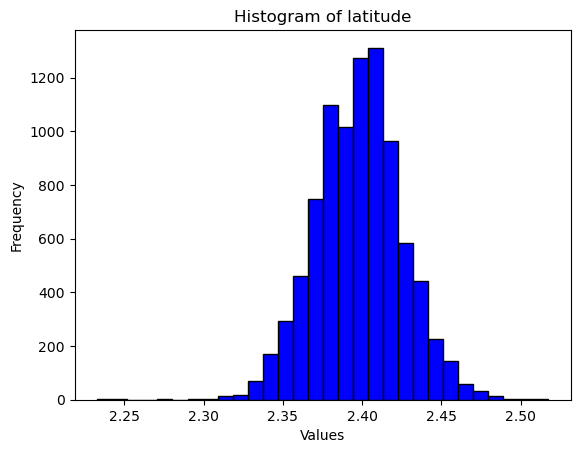

In [41]:
plt.hist(y, bins=30, color='blue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of latitude')
# exact normal

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=scaler.transform(x)
with open('scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)
print (x)

[[ -0.18674033  -1.57048454 -15.93503226  -1.76655701   6.27758256
   -1.76756142]
 [ -3.67411438  -2.69832244 -15.96893085  -1.67418462   6.23180014
   -2.83936694]
 [ -3.67411438  -2.69832244 -17.86350455  -1.84133466   6.26212075
   -2.83936694]
 ...
 [ -3.67411438  -1.57048454 -15.64554772  -1.67418462   6.23593443
   -2.30346418]
 [ -3.67411438  -1.57048454 -18.59652848  -1.86332809   6.10815398
   -2.30346418]
 [ -0.18674033  -1.57048454 -14.38297137  -1.86332809   6.10638294
   -1.76756142]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Model

In [43]:




X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)


rf_regressor = RandomForestRegressor(max_depth=6,n_estimators=50,max_features=3)

rf_regressor.fit(X_train, y_train)


y_train_pred = rf_regressor.predict(X_train)
y_val_pred = rf_regressor.predict(X_val)
y_test_pred = rf_regressor.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

cv_scores = cross_val_score(rf_regressor, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error')
cv_mse_mean = -cv_scores.mean()

# Print results
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Validation):", mse_val)
print("Mean Squared Error (Test):", mse_test)

print("R-squared Score (Train):", r2_train)
print("R-squared Score (Validation):", r2_val)
print("R-squared Score (Test):", r2_test)

print("Cross-Validation Mean Squared Error:", cv_mse_mean)
with open('rf_regressor_model.pickle', 'wb') as f:
    pickle.dump(rf_regressor, f)

Mean Squared Error (Train): 0.00029632527945686743
Mean Squared Error (Validation): 0.0003267762149496616
Mean Squared Error (Test): 0.00031597610630078874
R-squared Score (Train): 0.6066717150798806
R-squared Score (Validation): 0.5779608763934391
R-squared Score (Test): 0.5418996211224066
Cross-Validation Mean Squared Error: 0.00031864412734376995


In [44]:





X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

xgb_regressor = xgb.XGBRegressor(alpha=0.3)


xgb_regressor.fit(X_train, y_train)

y_train_pred = xgb_regressor.predict(X_train)
y_val_pred = xgb_regressor.predict(X_val)
y_test_pred = xgb_regressor.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)


cv_scores = cross_val_score(xgb_regressor, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error')
cv_mse_mean = -cv_scores.mean()

# Print results
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Validation):", mse_val)
print("Mean Squared Error (Test):", mse_test)

print("R-squared Score (Train):", r2_train)
print("R-squared Score (Validation):", r2_val)
print("R-squared Score (Test):", r2_test)

print("Cross-Validation Mean Squared Error:", cv_mse_mean)
with open('xgb_regressor_model.pickle', 'wb') as f:
    pickle.dump(xgb_regressor, f)

Mean Squared Error (Train): 0.00019933386874848255
Mean Squared Error (Validation): 0.00024838715478999807
Mean Squared Error (Test): 0.0002268181751608491
R-squared Score (Train): 0.735413566925379
R-squared Score (Validation): 0.6792021807987266
R-squared Score (Test): 0.6711602874218658
Cross-Validation Mean Squared Error: 0.00023502579911358876


In [45]:




X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)


linear_regressor = LinearRegression()


linear_regressor.fit(X_train, y_train)


y_train_pred = linear_regressor.predict(X_train)
y_val_pred = linear_regressor.predict(X_val)
y_test_pred = linear_regressor.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)


cv_scores = cross_val_score(linear_regressor, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error')
cv_mse_mean = -cv_scores.mean()

print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Validation):", mse_val)
print("Mean Squared Error (Test):", mse_test)

print("R-squared Score (Train):", r2_train)
print("R-squared Score (Validation):", r2_val)
print("R-squared Score (Test):", r2_test)

print("Cross-Validation Mean Squared Error:", cv_mse_mean)
with open('linear_regressor_model.pickle', 'wb') as f:
    pickle.dump(linear_regressor, f)

Mean Squared Error (Train): 0.0005232461084574662
Mean Squared Error (Validation): 0.000538991355265817
Mean Squared Error (Test): 0.0004981005180217784
R-squared Score (Train): 0.3054676441782993
R-squared Score (Validation): 0.3038800598050274
R-squared Score (Test): 0.2778566749990594
Cross-Validation Mean Squared Error: 0.0005273622710297113


In [46]:





# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=0)

# Apply polynomial features
degree = 4 # Degree of the polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)
X_test_poly = poly_features.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_val_poly_scaled = scaler.transform(X_val_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)


alpha = 0.0
ridge_regressor = Ridge(alpha=alpha)


ridge_regressor.fit(X_train_poly_scaled, y_train)


y_train_pred = ridge_regressor.predict(X_train_poly_scaled)
y_val_pred = ridge_regressor.predict(X_val_poly_scaled)
y_test_pred = ridge_regressor.predict(X_test_poly_scaled)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)
r2_test = r2_score(y_test, y_test_pred)

# Perform cross-validation
cv_scores = cross_val_score(ridge_regressor, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error')
cv_mse_mean = -cv_scores.mean()

# Print results
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Validation):", mse_val)
print("Mean Squared Error (Test):", mse_test)

print("R-squared Score (Train):", r2_train)
print("R-squared Score (Validation):", r2_val)
print("R-squared Score (Test):", r2_test)

print("Cross-Validation Mean Squared Error:", cv_mse_mean)
with open('ridge_regressor_model.pickle', 'wb') as f:
    pickle.dump(ridge_regressor, f)

Mean Squared Error (Train): 0.0004363419619400867
Mean Squared Error (Validation): 0.0004436097623084861
Mean Squared Error (Test): 0.0004969068551947664
R-squared Score (Train): 0.4208201344038357
R-squared Score (Validation): 0.427067617706421
R-squared Score (Test): 0.2795872406412151
Cross-Validation Mean Squared Error: 0.0005273620810483533


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.48337e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.48649e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
